In [0]:
import pandas as pd
import keras
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint

Using TensorFlow backend.


In [0]:

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/Colab Notebooks/wine"

kaggle_wine.csv		      winequality-white-testing.csv
winequality-white-sample.csv  winequality-white-training.csv


In [0]:
wine_train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/wine/winequality-white-training.csv').drop(['Id'],axis=1)


In [0]:
list(wine_train_df)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [0]:
#fixed acidity (-0.11),volatile acidity (-0.19) chlorides(-0.21), density(-0.31) , and have certain positive correlation with alcohol(0.43).
input_df=wine_train_df.drop(['quality','citric acid','residual sugar','free sulfur dioxide','total sulfur dioxide','pH','sulphates'],axis=1)
output_df=wine_train_df['quality']
# y is of int type. Change it to categorical
output_df = output_df.astype('object')

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
output_df = le.fit_transform(output_df)
#  one hot encoding
from keras.utils import np_utils
output_df = np_utils.to_categorical(output_df)

In [0]:
input_df

,fixed acidity,volatile acidity,chlorides,density,alcohol
0,8.7,0.230,0.044,0.99975,8.800000
1,5.0,0.270,0.076,0.99204,10.100000
2,8.0,0.160,0.033,0.99410,10.300000
3,5.8,0.280,0.053,0.99240,10.200000
4,7.1,0.140,0.104,0.99057,11.500000
5,7.5,0.300,0.026,0.99244,11.100000
6,6.6,0.410,0.110,0.99672,9.000000
7,6.2,0.300,0.052,0.99266,10.100000
8,6.8,0.230,0.026,0.99040,12.500000
9,6.8,0.220,0.053,0.99290,10.600000


In [0]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train,X_test,y_train,y_test = train_test_split(input_df,output_df,test_size=0.3,random_state = 0)
#mnist_test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mnist_test_label.csv')
#X_test=mnist_test_df.drop(['Category'],axis=1)
#y_test=mnist_test_df['Category']


In [0]:
# convert to one hot encoding
n_classes = 7
#y_train = keras.utils.to_categorical(y_train, n_classes)
#y_test = keras.utils.to_categorical(y_test, n_classes)


In [0]:
#X_train.describe()

In [0]:
#X_train = X_train.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)), axis=0)
#X_test = X_test.apply(lambda x: (x - np.min(x)) /  (np.max(x) - np.min(x)), axis=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [0]:
X_train

array([[ 0.55784544, -1.06313624, -0.83024261, -0.41652093,  1.51571662],
       [ 2.61752777, -0.31956233, -0.02643202,  0.33379796, -0.26918219],
       [ 0.55784544, -0.17084755,  0.16269989,  1.97923412, -1.16163159],
       ...,
       [ 0.92131879,  2.80344806,  2.38499977,  1.41978583, -1.16163159],
       [ 3.34447448,  3.74530833, -0.31012987, -0.69295421,  1.67798014],
       [-1.25952133, -0.17084755, -0.07371499,  0.69579391, -0.91823629]])

In [0]:
def create_dense():
  model = Sequential()
  model.add(Dense(11, input_dim=5, kernel_initializer='uniform', activation='relu'))
  model.add(Dense(10,  kernel_initializer='uniform', activation='relu'))
  #model.add(Dense(9,  kernel_initializer='uniform', activation='relu'))
  model.add(Dense(9,  kernel_initializer='uniform', activation='relu'))
  #model.add(Dense(30, activation='relu'))
  model.add(Dense(units=7, activation='softmax'))
  return model

def evaluate(model, batch_size=8, epochs=11):
    model.summary()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=1)
    loss, accuracy  = model.evaluate(X_test, y_test)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_106 (Dense)            (None, 11)                66        
_________________________________________________________________
dense_107 (Dense)            (None, 10)                120       
_________________________________________________________________
dense_108 (Dense)            (None, 9)                 99        
_________________________________________________________________
dense_109 (Dense)            (None, 7)                 70        
Total params: 355
Trainable params: 355
Non-trainable params: 0
_________________________________________________________________
Train on 2728 samples, validate on 1170 samples
Epoch 1/11
2728/2728 [==============================] - 4s 1ms/step - loss: 0.3394 - acc: 0.8551 - val_loss: 0.2982 - val_acc: 0.8575
Epoch 2/11
2728/2728 [==============================] - 1s 310us/step - loss: 0.2942 - acc: 0.

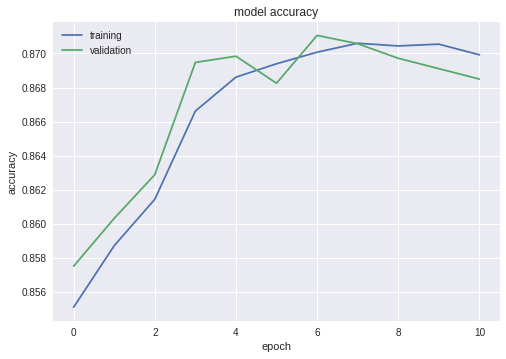


Test loss: 0.27
Test accuracy: 0.868


In [0]:
model = create_dense()
evaluate(model)

In [0]:
wine_test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/wine/winequality-white-testing.csv').drop(['Id'],axis=1)

In [0]:
wine_test_df = sc.fit_transform(wine_test_df)

In [0]:
pred=model.predict(wine_test_df, batch_size=None, verbose=0, steps=None)

In [0]:
pred_df =pd.DataFrame(data=pred)

In [0]:
pred_df

,0,1,2,3,4,5,6
0,0.006836,0.004496,0.056229,0.485534,0.339294,0.104525,0.003086
1,0.000733,0.008829,0.174097,0.636643,0.162703,0.016944,0.000051
2,0.003621,0.009926,0.256567,0.590600,0.117601,0.021640,0.000045
3,0.002393,0.008497,0.188334,0.560970,0.220388,0.018781,0.000638
4,0.004335,0.014903,0.575554,0.381079,0.019753,0.004310,0.000065
5,0.003318,0.005618,0.015841,0.280244,0.520813,0.173712,0.000454
6,0.012552,0.081636,0.578538,0.272787,0.041760,0.011690,0.001037
7,0.003395,0.128713,0.501402,0.309103,0.048857,0.008292,0.000239
8,0.001696,0.094610,0.693606,0.191189,0.016790,0.001975,0.000133
9,0.001908,0.022780,0.264566,0.527926,0.168622,0.014041,0.000158


In [0]:
pred = pred_df.idxmax(axis=1)+3

In [0]:
pred

0      6
1      6
2      6
3      6
4      5
5      7
6      5
7      5
8      5
9      6
10     6
11     6
12     6
13     6
14     5
15     5
16     5
17     7
18     5
19     6
20     7
21     7
22     6
23     6
24     5
25     5
26     6
27     6
28     6
29     6
      ..
970    6
971    6
972    5
973    7
974    5
975    6
976    7
977    6
978    6
979    5
980    6
981    6
982    7
983    5
984    6
985    5
986    5
987    6
988    5
989    5
990    5
991    7
992    6
993    6
994    7
995    6
996    6
997    6
998    6
999    5
Length: 1000, dtype: int64

In [0]:
pred.to_csv('/content/drive/My Drive/Colab Notebooks/wine/kaggle_wine1.csv')